In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. OVERVIEW


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('01_dataset.csv')
df

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
0,1639,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1000000.0,1.000000e+06,1.000000e+06,1.000000e+06,1.000205e+06,1.000000e+06,1.000000e+06,1.000000e+06,NaN,1.000000e+06,1.000000e+06,1.000000e+06,1.000205e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.0,1000000.0,1000000.0,1000000.0,1000000.0,NaN,1000000.0,431.0,431.0,431.0,431.0,1.0,7.0,7.0,17.0,17.0,2.0,7.0,7.0,2.0,2.0,7.0,2.0,2.0,2.0,7.0,7.0,2.0,2.0,7.0,2.0,NaN,2.0,17.0,12.0,7.0,2.0,12.0,2.0,7.0,2.0,17.0,12.0,7.0,2.0,12.0,2.0,7.0,7.000000,3.666667,7.000000,3.666667,3.666667,NaN,NaN,2.000000,2.000000,2.000000,7.000000,3.666667,7.000000,3.666667,3.666667,1000000.0
1,23717,0

# 2. Data Wrangling

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 124 columns):
 #    Column                                Non-Null Count  Dtype  
---   ------                                --------------  -----  
 0    customer_id                           20000 non-null  int64  
 1    label                                 20000 non-null  int64  
 2    SHORT_TERM_COUNT                      18000 non-null  float64
 3    MID_TERM_COUNT                        18000 non-null  float64
 4    LONG_TERM_COUNT                       18000 non-null  float64
 5    SHORT_TERM_COUNT_BANK                 18000 non-null  float64
 6    MID_TERM_COUNT_BANK                   18000 non-null  float64
 7    LONG_TERM_COUNT_BANK                  18000 non-null  float64
 8    SHORT_TERM_COUNT_NON_BANK             18000 non-null  float64
 9    MID_TERM_COUNT_NON_BANK               18000 non-null  float64
 10   LONG_TERM_COUNT_NON_BANK              18000 non-null  float64
 11   

In [6]:
df.describe()

,customer_id,label,SHORT_TERM_COUNT,MID_TERM_COUNT,LONG_TERM_COUNT,SHORT_TERM_COUNT_BANK,MID_TERM_COUNT_BANK,LONG_TERM_COUNT_BANK,SHORT_TERM_COUNT_NON_BANK,MID_TERM_COUNT_NON_BANK,LONG_TERM_COUNT_NON_BANK,NUMBER_OF_LOANS,NUMBER_OF_LOANS_BANK,NUMBER_OF_LOANS_NON_BANK,NUMBER_OF_CREDIT_CARDS,NUMBER_OF_CREDIT_CARDS_BANK,NUMBER_OF_CREDIT_CARDS_NON_BANK,NUMBER_OF_RELATIONSHIP,NUMBER_OF_RELATIONSHIP_BANK,NUMBER_OF_RELATIONSHIP_NON_BANK,NUM_NEW_LOAN_TAKEN_3M,NUM_NEW_LOAN_TAKEN_6M,NUM_NEW_LOAN_TAKEN_9M,NUM_NEW_LOAN_TAKEN_12M,NUM_NEW_LOAN_TAKEN_BANK_3M,NUM_NEW_LOAN_TAKEN_BANK_6M,NUM_NEW_LOAN_TAKEN_BANK_9M,NUM_NEW_LOAN_TAKEN_BANK_12M,NUM_NEW_LOAN_TAKEN_NON_BANK_3M,NUM_NEW_LOAN_TAKEN_NON_BANK_6M,NUM_NEW_LOAN_TAKEN_NON_BANK_9M,NUM_NEW_LOAN_TAKEN_NON_BANK_12M,OUTSTANDING_BAL_LOAN_CURRENT,OUTSTANDING_BAL_LOAN_3M,OUTSTANDING_BAL_LOAN_6M,OUTSTANDING_BAL_LOAN_9M,OUTSTANDING_BAL_LOAN_12M,OUTSTANDING_BAL_CC_3M,OUTSTANDING_BAL_CC_6M,OUTSTANDING_BAL_CC_9M,OUTSTANDING_BAL_CC_12M,OUTSTANDING_BAL_ALL_3M,OUTSTANDING_BAL_ALL_6M,OUTSTANDING_BAL_ALL_9M,OUTSTANDING_BAL_ALL_12M,OUTSTANDING_BAL_LOAN_3M_6M,OUTSTANDING_BAL_LOAN_6M_9M,OUTSTANDING_BAL_LOAN_9M_12M,OUTSTANDING_BAL_LOAN_6M_12M,OUTSTANDING_BAL_LOAN_3M_12M,OUTSTANDING_BAL_CC_3M_6M,OUTSTANDING_BAL_CC_6M_9M,OUTSTANDING_BAL_CC_9M_12M,OUTSTANDING_BAL_CC_6M_12M,OUTSTANDING_BAL_CC_3M_12M,OUTSTANDING_BAL_ALL_3M_6M,OUTSTANDING_BAL_ALL_6M_9M,OUTSTANDING_BAL_ALL_9M_12M,OUTSTANDING_BAL_ALL_6M_12M,OUTSTANDING_BAL_ALL_3M_12M,INCREASING_BAL_3M_LOAN,INCREASING_BAL_6M_LOAN,INCREASING_BAL_3M_CC,INCREASING_BAL_6M_CC,INCREASING_BAL_3M_ALL,INCREASING_BAL_6M_ALL,OUTSTANDING_BAL_CC_CURRENT,CREDIT_CARD_MONTH_SINCE_10DPD,CREDIT_CARD_MONTH_SINCE_30DPD,CREDIT_CARD_MONTH_SINCE_60DPD,CREDIT_CARD_MONTH_SINCE_90DPD,CREDIT_CARD_NUMBER_OF_LATE_PAYMENT,ENQUIRIES_3M,ENQUIRIES_6M,ENQUIRIES_9M,ENQUIRIES_12M,ENQUIRIES_FROM_BANK_3M,ENQUIRIES_FROM_NON_BANK_3M,ENQUIRIES_FOR_LOAN_3M,ENQUIRIES_FOR_CC_3M,ENQUIRIES_FROM_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_3M,ENQUIRIES_FROM_BANK_FOR_CC_3M,ENQUIRIES_FROM_NON_BANK_FOR_CC_3M,ENQUIRIES_FROM_BANK_6M,ENQUIRIES_FROM_NON_BANK_6M,ENQUIRIES_FOR_LOAN_6M,ENQUIRIES_FOR_CC_6M,ENQUIRIES_FROM_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_6M,ENQUIRIES_FROM_BANK_FOR_CC_6M,ENQUIRIES_FROM_NON_BANK_FOR_CC_6M,ENQUIRIES_FROM_BANK_9M,ENQUIRIES_FROM_NON_BANK_9M,ENQUIRIES_FOR_LOAN_9M,ENQUIRIES_FOR_CC_9M,ENQUIRIES_FROM_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_9M,ENQUIRIES_FROM_BANK_FOR_CC_9M,ENQUIRIES_FROM_NON_BANK_FOR_CC_9M,ENQUIRIES_FROM_BANK_12M,ENQUIRIES_FROM_NON_BANK_12M,ENQUIRIES_FOR_LOAN_12M,ENQUIRIES_FOR_CC_12M,ENQUIRIES_FROM_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_NON_BANK_FOR_LOAN_12M,ENQUIRIES_FROM_BANK_FOR_CC_12M,ENQUIRIES_FROM_NON_BANK_FOR_CC_12M,ENQUIRIES_3M_6M,ENQUIRIES_6M_9M,ENQUIRIES_9M_12M,ENQUIRIES_6M_12M,ENQUIRIES_3M_12M,ENQUIRIES_FROM_BANK_3M_6M,ENQUIRIES_FROM_BANK_6M_9M,ENQUIRIES_FROM_BANK_9M_12M,ENQUIRIES_FROM_BANK_6M_12M,ENQUIRIES_FROM_BANK_3M_12M,ENQUIRIES_FROM_NON_BANK_3M_6M,ENQUIRIES_FROM_NON_BANK_6M_9M,ENQUIRIES_FROM_NON_BANK_9M_12M,ENQUIRIES_FROM_NON_BANK_6M_12M,ENQUIRIES_FROM_NON_BANK_3M_12M,OUTSTANDING_BAL_ALL_CURRENT
count,20000.000000,20000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800000e+04,1.800

In [7]:
df.isnull().sum()

customer_id                          0
label                                0
SHORT_TERM_COUNT                  2000
MID_TERM_COUNT                    2000
LONG_TERM_COUNT                   2000
                                  ... 
ENQUIRIES_FROM_NON_BANK_6M_9M     2000
ENQUIRIES_FROM_NON_BANK_9M_12M    2000
ENQUIRIES_FROM_NON_BANK_6M_12M    2000
ENQUIRIES_FROM_NON_BANK_3M_12M    2000
OUTSTANDING_BAL_ALL_CURRENT       2000
Length: 124, dtype: int64

In [8]:
df.drop(columns='customer_id', inplace=True)
df = pd.concat([df['label'], df.drop(columns='label') - 1])

In [9]:
# Drop the 'label' column for plotting
df_features = df.drop(columns=['label'])
    
# Create box plots for each feature individually
plt.figure(figsize=(100, 100))
for i, column in enumerate(df_features.columns):
    plt.subplot(len(df_features.columns) // 5 + 1, 5, i + 1)
    sns.boxplot(x=df_features[column])
    plt.title(f'{column}')
plt.tight_layout()
plt.show()

In [10]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df < lower_bound) | (df > upper_bound)

# Calculate the ratio of outliers for each column
outliers_ratio = outliers.sum() / len(outliers)

# Sort the outliers ratio in descending order
outliers_ratio = outliers_ratio.sort_values(ascending=False)

# Display the outliers ratio
with pd.option_context('display.max_rows', None):
    print(outliers_ratio)

INCREASING_BAL_3M_CC                    0.126275
ENQUIRIES_9M_12M                        0.111550
ENQUIRIES_FROM_NON_BANK_6M_12M          0.110225
INCREASING_BAL_6M_CC                    0.103925
ENQUIRIES_FOR_CC_3M                     0.101225
ENQUIRIES_FROM_NON_BANK_3M_6M           0.094975
label                                   0.091100
ENQUIRIES_FROM_BANK_FOR_CC_3M           0.084325
ENQUIRIES_FROM_NON_BANK_6M_9M           0.075800
MID_TERM_COUNT_BANK                     0.073150
ENQUIRIES_FOR_CC_12M                    0.069650
OUTSTANDING_BAL_ALL_3M_6M               0.068675
INCREASING_BAL_3M_ALL                   0.063875
ENQUIRIES_FROM_NON_BANK_9M_12M          0.060150
ENQUIRIES_FROM_BANK_FOR_CC_12M          0.058550
ENQUIRIES_FROM_NON_BANK_FOR_CC_12M      0.058450
OUTSTANDING_BAL_CC_12M                  0.057375
OUTSTANDING_BAL_CC_9M                   0.056125
NUMBER_OF_CREDIT_CARDS_BANK             0.054225
ENQUIRIES_FOR_CC_9M                     0.053900
OUTSTANDING_BAL_LOAN

# 3. EDA

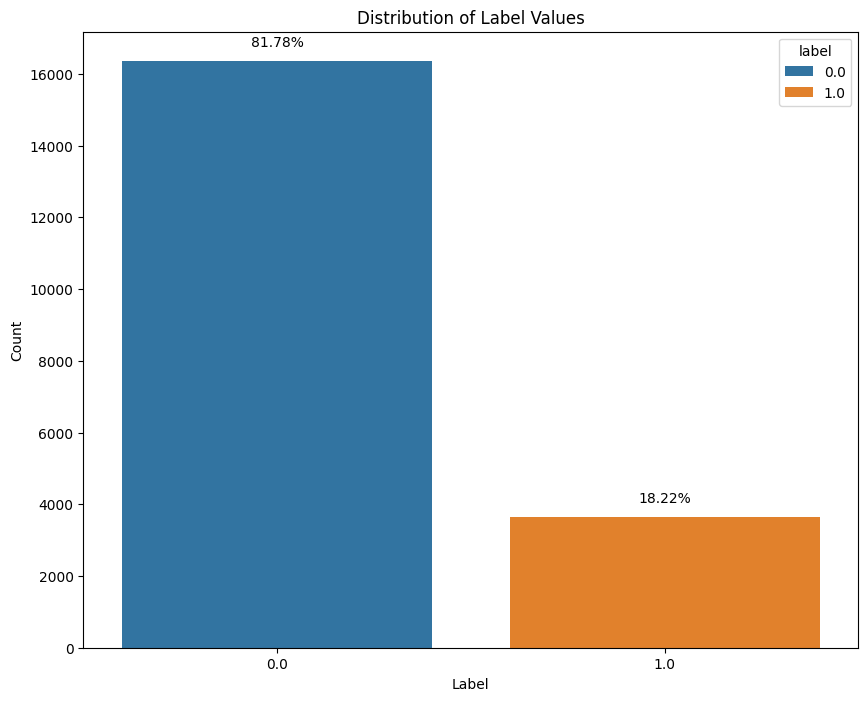

In [11]:
# Count the occurrences of each unique value in the 'label' column
label_counts = df['label'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index)
rate = label_counts.values / label_counts.sum()
for i, v in enumerate(label_counts.values):
    plt.text(i, v + 0.02 * max(label_counts.values), f'{rate[i]:.2%}', ha='center', va='bottom')
plt.title('Distribution of Label Values')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap with the specified figure size
plt.figure(figsize=(200, 160))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

MemoryError: In RendererAgg: Out of memory

Error in callback <function _draw_all_if_interactive at 0x0000013C4CD6F740> (for post_execute), with arguments args (),kwargs {}:


MemoryError: In RendererAgg: Out of memory

MemoryError: In RendererAgg: Out of memory

<Figure size 20000x16000 with 2 Axes>